# Importing

In [9]:
# Common
import os
import keras 
import numpy as np

# Data
from keras.preprocessing.image import ImageDataGenerator as IDG

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Trained Models
from tensorflow.keras.applications import InceptionV3, Xception, ResNet152V2, ResNet50V2, ResNet50

# Model
from keras.models import Sequential, load_model
from keras.layers import GlobalAvgPool2D as GAP, Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Layer, ReLU, Add, InputLayer, Multiply

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model viz


# Data Generation

In [10]:
# Initialize DataGenerator
train_gen = IDG(
    rescale=1./255, # scale pixel values between 0 and 1
    horizontal_flip=True, 
    rotation_range=20, # rotate images by up to 20 degrees
    shear_range = .2, # apply shear transformation to images
    zoom_range = .2, # zoom into or out of images
    validation_split =0.2 # set aside 20% of the data for validation
)

# Load Data
train_ds = train_gen.flow_from_directory(
    "dataset", 
    target_size=(256,256), 
    class_mode="categorical", 
    subset='training', 
    shuffle=True, 
    batch_size=32
)

valid_ds = train_gen.flow_from_directory(
    "dataset", 
    target_size=(256,256), 
    class_mode="categorical", 
    subset='validation', 
    shuffle=True, 
    batch_size=32
)



Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


In [11]:
class_names = [f for f in os.listdir("dataset") if not f.startswith('.')]
n_classes = len(class_names)

print(f"Total No. of Classes : {n_classes}")

Total No. of Classes : 11


# Model

In [12]:
import numpy as np
import keras
import tensorflow_addons as tfa
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
name = "final_model"
# Define the model
model = Sequential()
model.add(Conv2D(16, (3, 3) ,padding="same", activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3) ,padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3) ,padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (7, 7) ,padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5, 5) ,padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3) ,padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='softmax'))
# Compile the model
cbs = [
    EarlyStopping(restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)

]
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 128)      

## Fitting the model


In [ ]:
history = model.fit(train_ds, epochs=1, validation_data=valid_ds)


## Create Train Vs Validation Graph

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

In [ ]:
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
import pydot
import graphviz



# Create Model Architcture Graph

In [14]:
fig = SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB',expand_nested=False, dpi=60).create(prog='dot',format='svg'))

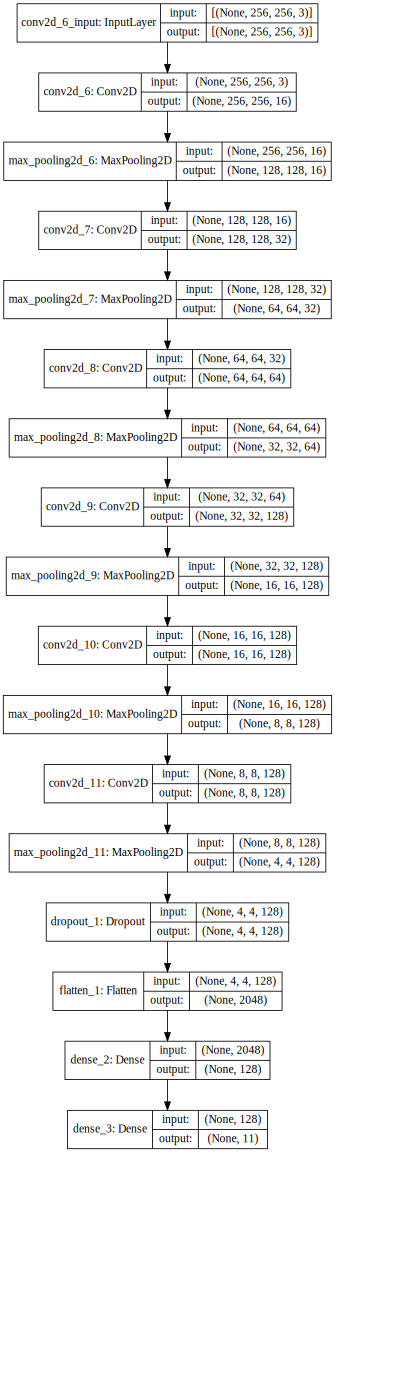

In [15]:
fig